<a href="https://colab.research.google.com/github/millenasiqueira/GBC-Projects-/blob/main/Copy_of_Final_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
pd.set_option('display.max_colwidth', None)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (3).csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['diabetes (3).csv']))

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
len(data)

768

## Data Preprocessing

In [ ]:
def data_preprocessing(data, target_col=None, get_dummy=True, scaling = True, scaling_method = "MinMax"):
    dfX, dfy = None, None
    if target_col:
        dfX = data.drop(target_col, axis=1)
        dfy = data[target_col]
    else:
        dfX = data
    # preprocessing independent variables
    categorical_df = None
    categorical_con = (dfX.dtypes=="object")
    categorical_cols = dfX.columns[categorical_con]
    numerical_cols = dfX.columns[-categorical_con]
    if categorical_cols.to_list():
        categorical_df = pd.get_dummies(dfX[categorical_cols])

    if scaling:
        if scaling_method == "MinMax":
            scaler = MinMaxScaler()
        elif scaling_method == "Standard":
            scaler = StandardScaler()
        else:
            raise "Input an unavailable scaling method."
    numerical_df = pd.DataFrame(scaler.fit_transform(dfX[numerical_cols]), columns=numerical_cols)
    if categorical_df:
        dfX = pd.concat((categorical_df, numerical_df), axis=1)
    else:
        dfX = numerical_df
    # preprocessing dependent variables
    if isinstance(dfy, pd.core.frame.Series):
        if dfy.dtypes == "object":
            labeler = LabelEncoder()
            print("Labels", labeler.classes_)
            dfy = pd.DataFrame(labeler.fit_transform(dfy), columns=[target_col])
        return dfX, dfy
    else:
        return dfX

In [ ]:
x = data.drop('Outcome',axis=1)
y = data['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0) # Splitting the data to use with the models

Using Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT_clf = DecisionTreeClassifier()
DT_clf.fit(X_train,y_train)
y_prediction = DT_clf.predict(X_test)

In [ ]:
DT_clf.score(X_test,y_test) #check our data score

0.7662337662337663

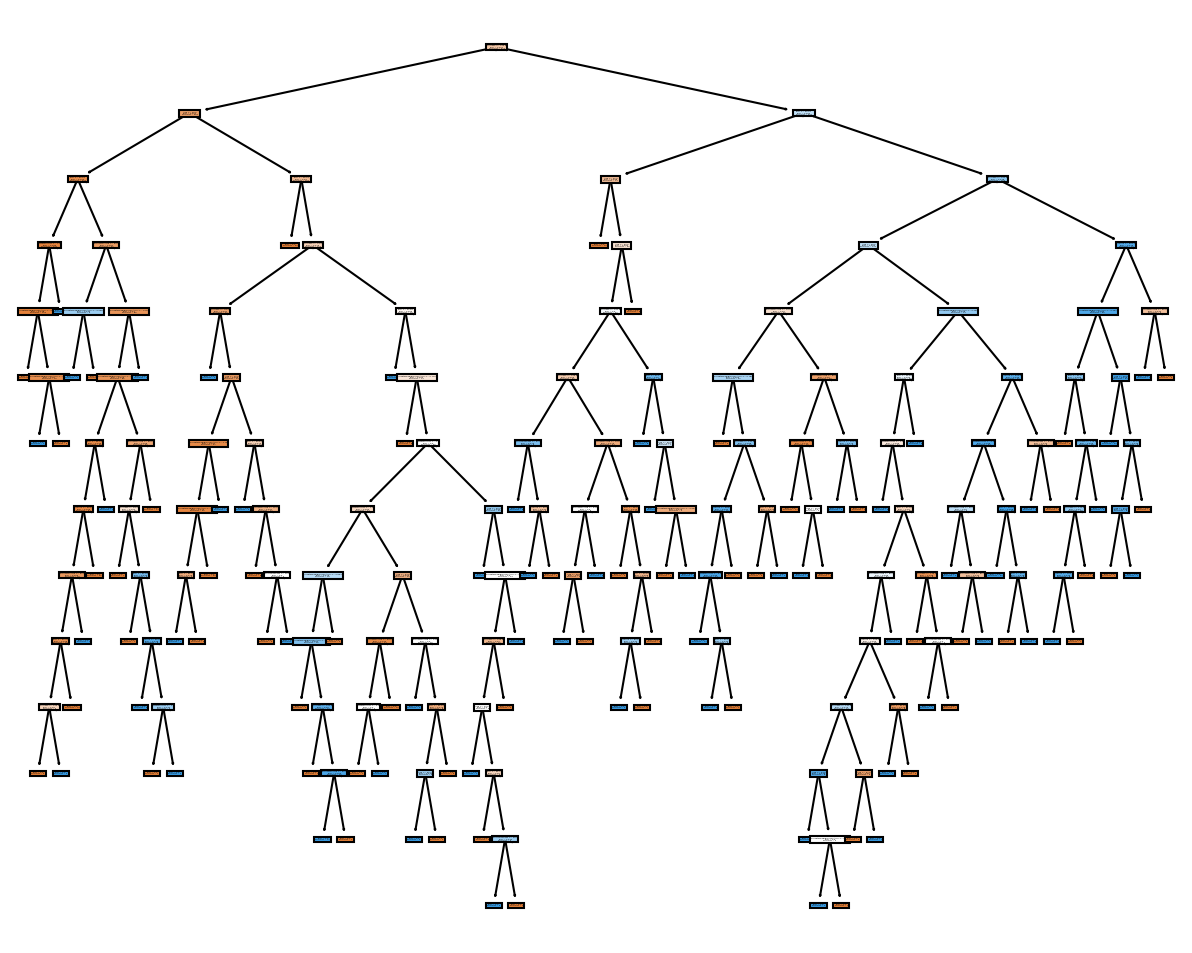

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8), dpi=150)
plot_tree(DT_clf, feature_names=x.columns, filled=True); #To visualize

Creating Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_test,y_prediction))

[[87 20]
 [16 31]]


In [ ]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83       107
           1       0.61      0.66      0.63        47

    accuracy                           0.77       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.77      0.77      0.77       154



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(n_estimators=40)

In [ ]:
RF_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40)

In [ ]:
RFC_pred = RF_clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,RFC_pred))

[[94 13]
 [20 27]]


In [ ]:
print(classification_report(y_test,RFC_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       107
           1       0.68      0.57      0.62        47

    accuracy                           0.79       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154



Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [ ]:
logmodel = LogisticRegression(random_state=0, max_iter=10000).fit(X_train, y_train)

In [ ]:
y_predict = logmodel.predict(X_test)
y_predict

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
prediction = LogisticRegression(random_state=0, max_iter=42)
prediction.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=42, random_state=0)

In [ ]:
print(confusion_matrix(y_test,y_predict))

[[98  9]
 [18 29]]


In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



In [ ]:
prediction.score(X_train, y_train)

# Different Models' Parameters for GridSearchCV

In [ ]:
lr_params = {
    "penalty": ["l2"],
    "solver": ["lbfgs", "newton-cg", "sag", "saga"]
}
dt_rf_params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [3, 5, 7, 9],
    "min_samples_split": [0.001, 0.05, 0.1],
}

sgd_parms = {
    "loss": ["hinge", "log_loss", "modified_huber", "squared_hinge", "perceptron"],
    "penalty": ["l1", "l2"]


}
svc_params = {
    "C": [0.8, 1.0, 1.2],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],

}
algorithms_dict = dict(Logistic=lr_params, DecisionTree=dt_rf_params, RandomForest=dt_rf_params, SGD=sgd_parms, SVC=svc_params)
algorithms_dict

{'Logistic': {'penalty': ['l2'],
  'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']},
 'DecisionTree': {'criterion': ['gini', 'entropy', 'log_loss'],
  'max_depth': [3, 5, 7, 9],
  'min_samples_split': [0.001, 0.05, 0.1]},
 'RandomForest': {'criterion': ['gini', 'entropy', 'log_loss'],
  'max_depth': [3, 5, 7, 9],
  'min_samples_split': [0.001, 0.05, 0.1]},
 'SGD': {'loss': ['hinge',
   'log_loss',
   'modified_huber',
   'squared_hinge',
   'perceptron'],
  'penalty': ['l1', 'l2']},
 'SVC': {'C': [0.8, 1.0, 1.2], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}}

# Evaluate model performance with different parameters by GridSearchCV

In [ ]:
class select_classifier:
    def __init__(self, X_train, X_test, y_train, y_test, algorithms_dict):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.algorithms_dict = algorithms_dict

    def GridSearchCV_eval(self, model, param_grid, cv=5):
        estimator = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=cv)
        estimator.fit(self.X_train, self.y_train)
        return estimator.best_params_, estimator.best_score_

    def _eval(self):
        result_dict = dict(Model_type=[], Best_params=[], Best_Val_Scores=[])
        for algorithm in algorithms_dict:
            if algorithm == "Logistic":
                model = LogisticRegression()
            elif algorithm == "DecisionTree":
                model = DecisionTreeClassifier()
            elif algorithm == "RandomForest":
                model = RandomForestClassifier()
            elif algorithm == "SGD":
                model = SGDClassifier()
            elif algorithm == "SVC":
                model = SVC()
            else:
                raise "Input an unknown model algorithm."
            param_grid = algorithms_dict[algorithm]
            best_params, best_val_score = self.GridSearchCV_eval(model=model, param_grid=param_grid)
            result_dict["Model_type"].append(algorithm)
            result_dict["Best_params"].append(best_params)
            result_dict["Best_Val_Scores"].append(best_val_score)
        result = pd.DataFrame(result_dict).sort_values("Best_Val_Scores", ascending=False).reset_index(drop=True)
        return result

In [ ]:
dataset = pd.read_csv(io.BytesIO(uploaded['diabetes (3).csv']))
dfX, dfy = data_preprocessing(dataset, target_col="Outcome")
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.2, random_state=42)
obj = select_classifier(X_train, X_test, y_train, y_test, algorithms_dict=algorithms_dict)
result = obj._eval()
result

,Model_type,Best_params,Best_Val_Scores
0,RandomForest,"{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 0.001}",0.783473
1,SVC,"{'C': 1.2, 'kernel': 'rbf'}",0.762215
2,SGD,"{'loss': 'hinge', 'penalty': 'l1'}",0.760562
3,DecisionTree,"{'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 0.05}",0.760536
4,Logistic,"{'penalty': 'l2', 'solver': 'lbfgs'}",0.750833


# Dropping Features

In [ ]:
#dropping Pregnancies feature to re-evaluate and examine the performance of the model

feature_to_drop = 'Pregnancies'
x_drop = x.drop(columns=[feature_to_drop])
print(x_drop.head())




   Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0      148             72             35        0  33.6   
1       85             66             29        0  26.6   
2      183             64              0        0  23.3   
3       89             66             23       94  28.1   
4      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_drop, y, test_size=0.20, random_state=0) # Splitting the data to use with the models

Using Decision Tree after dropping feature


In [ ]:
DT_clf = DecisionTreeClassifier()
DT_clf.fit(X_train,y_train)
y_prediction = DT_clf.predict(X_test)

DT_clf.score(X_test,y_test) #check our data score

0.7077922077922078

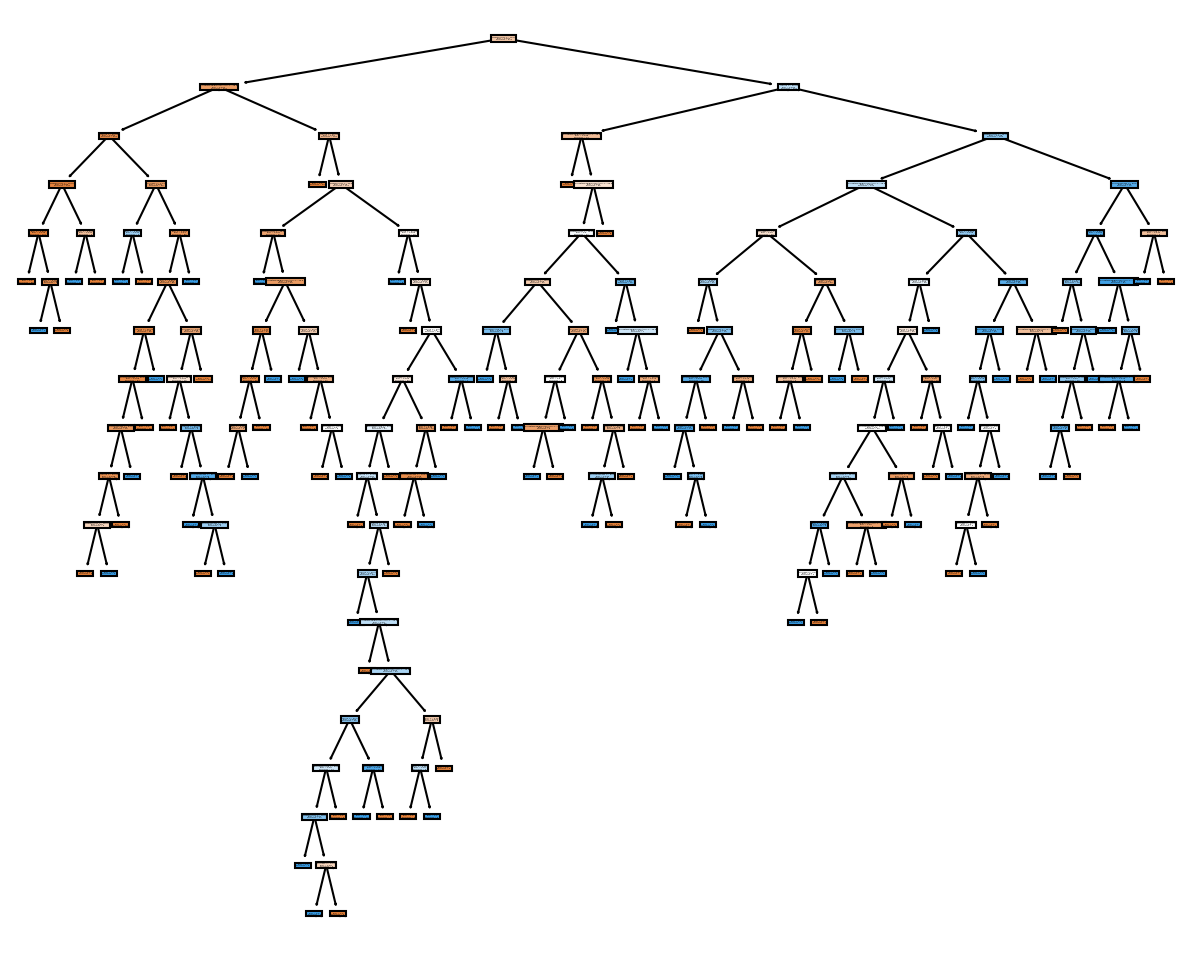

In [ ]:
plt.figure(figsize=(10,8), dpi=150)
plot_tree(DT_clf, feature_names=x.columns, filled=True); #To visualize

Creating Confusion Matrix after feature drop

In [ ]:
print(confusion_matrix(y_test,y_prediction))

[[82 25]
 [20 27]]


In [ ]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78       107
           1       0.52      0.57      0.55        47

    accuracy                           0.71       154
   macro avg       0.66      0.67      0.67       154
weighted avg       0.72      0.71      0.71       154



Random Forest after feature drop

In [ ]:
RF_clf = RandomForestClassifier(n_estimators=40)
RF_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40)

In [ ]:
RFC_pred = RF_clf.predict(X_test)
print(confusion_matrix(y_test,RFC_pred))

[[93 14]
 [17 30]]


In [ ]:
print(classification_report(y_test,RFC_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       107
           1       0.68      0.64      0.66        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.80      0.80      0.80       154



Logistic Regression after feature drop


In [ ]:
logmodel = LogisticRegression(random_state=0, max_iter=10000).fit(X_train, y_train)
y_predict = logmodel.predict(X_test)
y_predict

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
prediction = LogisticRegression(random_state=0, max_iter=42)
prediction.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=42, random_state=0)

In [ ]:
print(confusion_matrix(y_test,y_predict))

[[96 11]
 [19 28]]


In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       107
           1       0.72      0.60      0.65        47

    accuracy                           0.81       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154



Different Models Parameters for Gridsearchcv post feature drop

In [ ]:
lr_params = {
    "penalty": ["l2"],
    "solver": ["lbfgs", "newton-cg", "sag", "saga"]
}
dt_rf_params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [3, 5, 7, 9],
    "min_samples_split": [0.001, 0.05, 0.1],
}

sgd_parms = {
    "loss": ["hinge", "log_loss", "modified_huber", "squared_hinge", "perceptron"],
    "penalty": ["l1", "l2"]


}
svc_params = {
    "C": [0.8, 1.0, 1.2],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],

}
algorithms_dict = dict(Logistic=lr_params, DecisionTree=dt_rf_params, RandomForest=dt_rf_params, SGD=sgd_parms, SVC=svc_params)
algorithms_dict

{'Logistic': {'penalty': ['l2'],
  'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']},
 'DecisionTree': {'criterion': ['gini', 'entropy', 'log_loss'],
  'max_depth': [3, 5, 7, 9],
  'min_samples_split': [0.001, 0.05, 0.1]},
 'RandomForest': {'criterion': ['gini', 'entropy', 'log_loss'],
  'max_depth': [3, 5, 7, 9],
  'min_samples_split': [0.001, 0.05, 0.1]},
 'SGD': {'loss': ['hinge',
   'log_loss',
   'modified_huber',
   'squared_hinge',
   'perceptron'],
  'penalty': ['l1', 'l2']},
 'SVC': {'C': [0.8, 1.0, 1.2], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}}

Evaluate model performance with different parameters by GridSearchCV post feature drop

In [ ]:
class select_classifier:
    def __init__(self, X_train, X_test, y_train, y_test, algorithms_dict):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.algorithms_dict = algorithms_dict

    def GridSearchCV_eval(self, model, param_grid, cv=5):
        estimator = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=cv)
        estimator.fit(self.X_train, self.y_train)
        return estimator.best_params_, estimator.best_score_

    def _eval(self):
        result_dict = dict(Model_type=[], Best_params=[], Best_Val_Scores=[])
        for algorithm in algorithms_dict:
            if algorithm == "Logistic":
                model = LogisticRegression()
            elif algorithm == "DecisionTree":
                model = DecisionTreeClassifier()
            elif algorithm == "RandomForest":
                model = RandomForestClassifier()
            elif algorithm == "SGD":
                model = SGDClassifier()
            elif algorithm == "SVC":
                model = SVC()
            else:
                raise "Input an unknown model algorithm."
            param_grid = algorithms_dict[algorithm]
            best_params, best_val_score = self.GridSearchCV_eval(model=model, param_grid=param_grid)
            result_dict["Model_type"].append(algorithm)
            result_dict["Best_params"].append(best_params)
            result_dict["Best_Val_Scores"].append(best_val_score)
        result = pd.DataFrame(result_dict).sort_values("Best_Val_Scores", ascending=False).reset_index(drop=True)
        return result

In [ ]:
dataset = pd.read_csv(io.BytesIO(uploaded['diabetes (3).csv']))
dfX, dfy = data_preprocessing(dataset, target_col="Outcome")
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.2, random_state=42)
obj = select_classifier(X_train, X_test, y_train, y_test, algorithms_dict=algorithms_dict)
result = obj._eval()
result

,Model_type,Best_params,Best_Val_Scores
0,RandomForest,"{'criterion': 'log_loss', 'max_depth': 7, 'min_samples_split': 0.05}",0.780168
1,SGD,"{'loss': 'log_loss', 'penalty': 'l2'}",0.765467
2,SVC,"{'C': 1.2, 'kernel': 'rbf'}",0.762215
3,DecisionTree,"{'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 0.05}",0.760536
4,Logistic,"{'penalty': 'l2', 'solver': 'lbfgs'}",0.750833
